In [5]:
import json
import boto3
import random

prompt = "A beautiful sunset over the ocean with a clear sky"
seed = random.randint(0, 2147483647)
client = boto3.client(service_name='bedrock-runtime')

request = json.dumps(
    {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {"text": prompt},
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "quality": "standard",
            "cfgScale": 8.0,
            "height": 512,
            "width": 512,
            "seed": seed,
        },
    }
)

response = client.invoke_model(
    modelId="amazon.titan-image-generator-v1", body=request
)

response_body = json.loads(response["body"].read())
base64_image_data = response_body["images"][0]

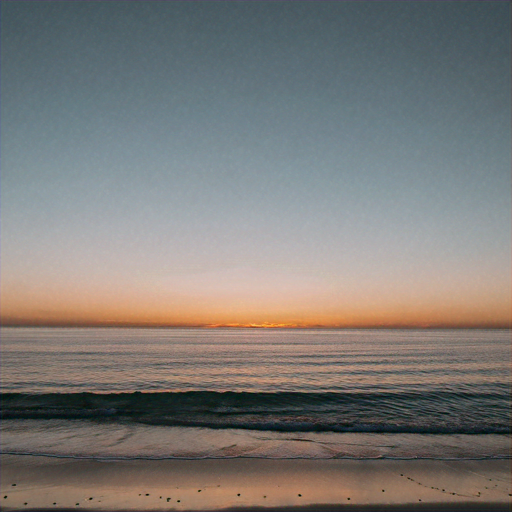

In [4]:
import base64
from io import BytesIO

img_raw = base64.b64decode(base64_image_data)
img = Image.open(BytesIO(img_raw))
display(img)